<div class="alert alert-info" role="alert">
<h4 class="alert-heading">Note séance 2: 5/10</h4>
</div>

<div class="alert alert-warning" role="alert">
Les resultats obtenus ne sont pas corrects.
</div>

Problème 2
Ricardo Barriga
Safwane Benidir

# 1) Développer un code qui permet d’appliquer un flou de bougé sur une image (télécharger l’image ”lena.png”sur Jalon) en fonction de la vitesse du bougé, de sa durée et de son orientation.

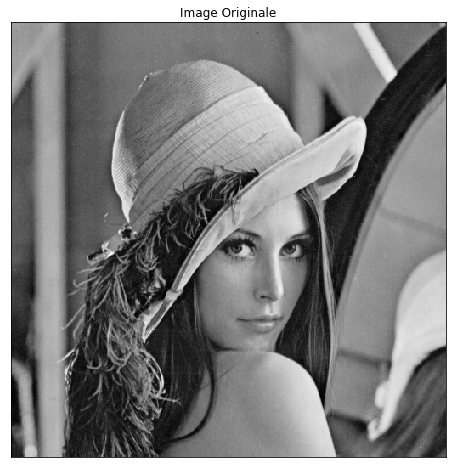

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('lena.png',0)  

(lignes, colonnes) = img.shape 

#Affichage de l'image originale
plt.figure(1,figsize=(8,8))
plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Image Originale')
plt.show() 

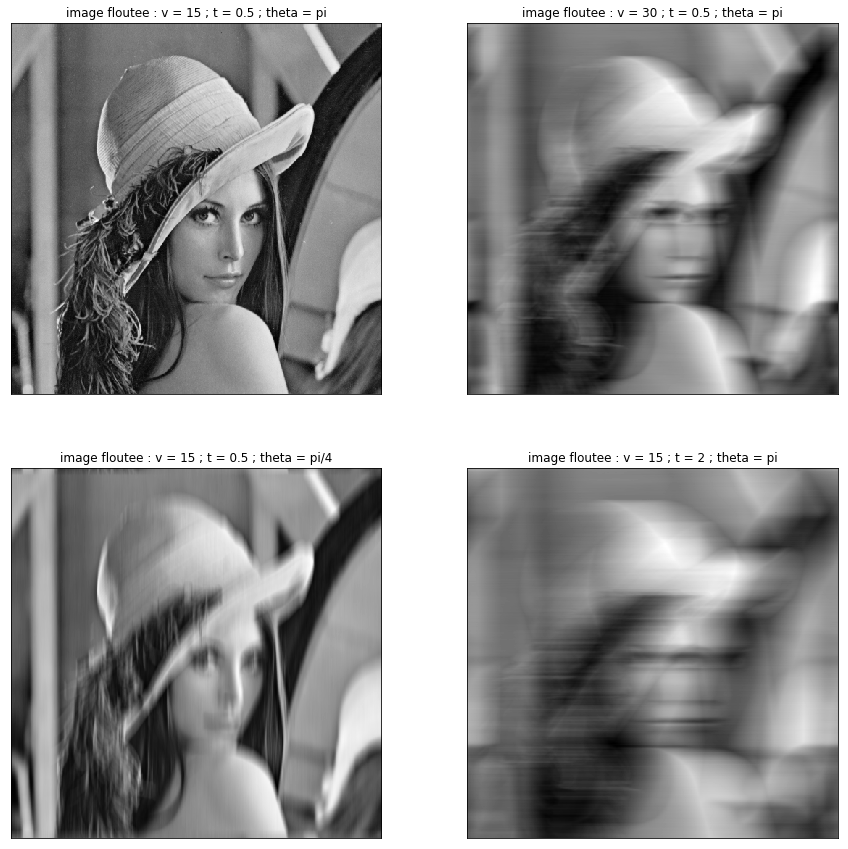

In [26]:
#Définition du filtre modélisant le flou de bougé
def filtre_flou(l, c, v, t, theta): # l:ligne ; c:colonne ; v:vitesse ; t:temps ; phi:angle
    L = v*t
    X=np.linspace(-l/2,l/2+1,l)/l
    Y=np.linspace(-c/2,c/2+1,c)/c
    [XX,YY]=np.meshgrid(X,Y)
    H = np.sinc(L*np.pi*((XX*np.cos(theta))+(YY*np.sin(theta))))
    return H



fft = np.fft.fft2(img)
fftshift = np.fft.fftshift(fft)

H1 = filtre_flou(lignes, colonnes, 2, 0.01, np.pi/2)
filtrage1 = H1*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee1 = np.fft.ifft2(filtrage1)
imagefloutee1 = np.abs(imagefloutee1)



H2 = filtre_flou(lignes, colonnes, 30, 0.5, np.pi)
filtrage2 = H2*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee2 = np.fft.ifft2(filtrage2) 
imagefloutee2 = np.abs(imagefloutee2)



H3 = filtre_flou(lignes, colonnes, 15, 0.5, np.pi/2)
filtrage3 = H3*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee3 = np.fft.ifft2(filtrage3) 
imagefloutee3 = np.abs(imagefloutee3)



H4 = filtre_flou(lignes, colonnes, 15, 2, np.pi)
filtrage4 = H4*fftshift #Filtrage de l'image : multiplication du filtre par la fftshift de l'image en frequentiel

#Reconstruction de l'image avec flou de bougé dans le domaine spatiale avec la transformée inverse
imagefloutee4 = np.fft.ifft2(filtrage4) 
imagefloutee4 = np.abs(imagefloutee4)




#affichage des images avec flou de bougé
plt.figure(2,figsize = (15,15)) 

plt.subplot(221)
plt.imshow(imagefloutee1, cmap = 'gray')
plt.title('image floutee : v = 15 ; t = 0.5 ; theta = pi')
plt.xticks([]), plt.yticks([])


plt.subplot(222)
plt.imshow(imagefloutee2, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image floutee : v = 30 ; t = 0.5 ; theta = pi')

plt.subplot(223)
plt.imshow(imagefloutee3, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image floutee : v = 15 ; t = 0.5 ; theta = pi/4')

plt.subplot(224)
plt.imshow(imagefloutee4, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image floutee : v = 15 ; t = 2 ; theta = pi')

plt.show()

Nous avons appliquer le filtre de bougé pour différents paramètres pour voir les effets. 
Quand v ou t augmente le flou est plus important
Quand on modifie theta l'orientation du flou est modifiée. En effet pour theta = pi/4 le flou est orientée selon une diagonale de l'image alors que pour theta = pi le flou est orientée selon l'axe horizontal

# 2. Proposer et programmer une méthode simple pour éliminer le flou de bougé connu (tous les paramètres du flou sont connus).

Pour éliminer le flou de bougé on applique un filtre qui est égal à l'inverse du flou de bougé : G = 1/H

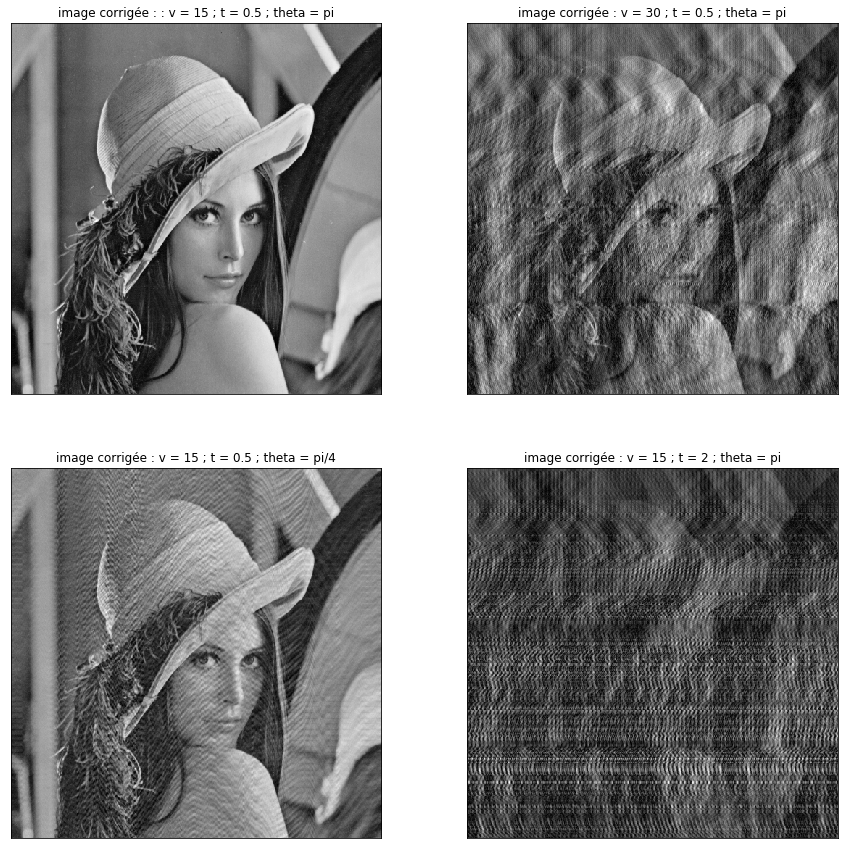

In [27]:
#On rectifie notre image en appliquant le filtre inverse
fft_imagefloutee1 = np.fft.fft2(imagefloutee1)
fft_shift_imagefloutee1 = np.fft.fftshift(fft_imagefloutee1)
G1 = 1/H1
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige1 = G1 * fft_shift_imagefloutee1
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige1 = np.fft.ifft2(fft_corrige1) 



#On rectifie notre image  en appliquant le filtre inverse
fft_imagefloutee2 = np.fft.fft2(imagefloutee2)
fft_shift_imagefloutee2 = np.fft.fftshift(fft_imagefloutee2)
G2 = 1/H2
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige2 = G2 * fft_shift_imagefloutee2
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige2 = np.fft.ifft2(fft_corrige2) 



#On rectifie notre image  en appliquant le filtre inverse
fft_imagefloutee3 = np.fft.fft2(imagefloutee3)
fft_shift_imagefloutee3 = np.fft.fftshift(fft_imagefloutee3)
G3 = 1/H3
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige3 = G3 * fft_shift_imagefloutee3
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige3 = np.fft.ifft2(fft_corrige3) 



#On rectifie notre image  en appliquant le filtre inverse
fft_imagefloutee4 = np.fft.fft2(imagefloutee4)
fft_shift_imagefloutee4 = np.fft.fftshift(fft_imagefloutee4)
G4 = 1/H4
#Filtrage de l'image avec flou de bougé : multiplication du filtre par la FFTshift de l'image en frequentiel
fft_corrige4 = G4 * fft_shift_imagefloutee4
#Reconstruction de l'image rectifiée dans le domaine spatial
image_corrige4 = np.fft.ifft2(fft_corrige4) 




#Affichage de l'image rectifiée
plt.figure(1,figsize=(15,15))
plt.subplot(221)
plt.imshow(np.abs(image_corrige1), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : : v = 15 ; t = 0.5 ; theta = pi')

#Affichage de l'image rectifiée
plt.subplot(222)
plt.imshow(np.abs(image_corrige2), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : v = 30 ; t = 0.5 ; theta = pi')

#Affichage de l'image rectifiée
plt.subplot(223)
plt.imshow(np.abs(image_corrige3), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : v = 15 ; t = 0.5 ; theta = pi/4')

#Affichage de l'image rectifiée
plt.subplot(224)
plt.imshow(np.abs(image_corrige4), cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('image corrigée : v = 15 ; t = 2 ; theta = pi')

plt.show()

# 3. Cette méthode fonctionne-t-elle toujours efficacement ? Évaluer l’efficacité de la méthode proposée en fonction des paramètres du flou.

La méthode du filtre inverse est très efficace dans notre cas car il n'y a pas de bruit. En effet tous les paramètres du flou sont connus et il n'y a pas de bruit donc en appliquant un filtre inverse G = 1/H on compense tous les effets du flou.
<font color='red'>Non, il faut obtenir pas la meme image apres filtrage.</font>

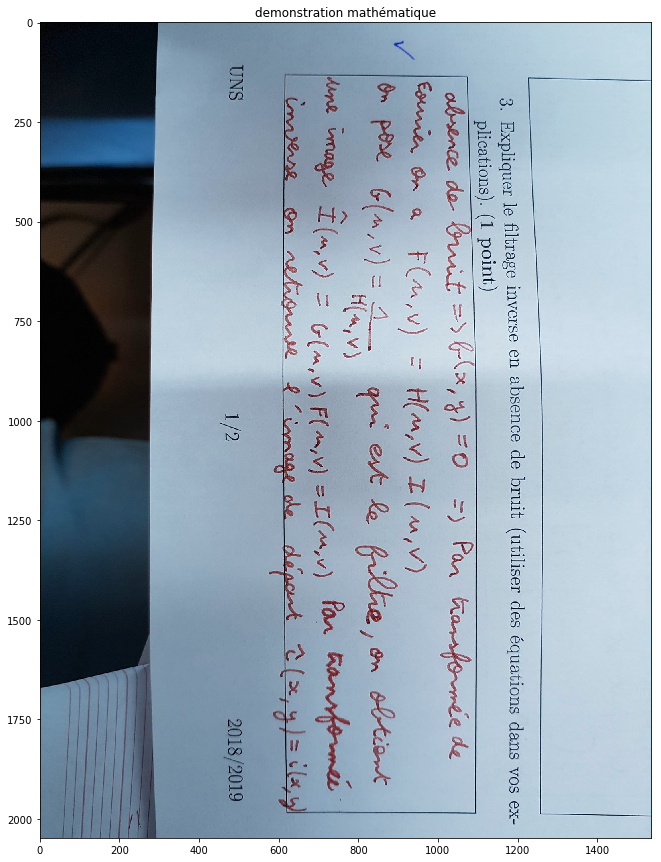

In [6]:
demonstration = cv2.imread('demo.jpg')

plt.figure(1,figsize=(15,15))

plt.imshow(demonstration)
plt.title("demonstration mathématique")
plt.show()